In [1413]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import seaborn as sns

In [1474]:
df = pd.read_csv('/Users/aimaldastagirzada/Downloads/archive (6)/Car details v3.csv')

In [1475]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [1476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [1477]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [1478]:
df.drop(columns=['name'], inplace=True)

In [1479]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [1480]:
df.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [1481]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [1482]:
df.drop(columns=['torque'], inplace=True)

In [1483]:
df.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7907.000000
unique,NaN,NaN,NaN,4,3,2,5,393,121,322,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,NaN
freq,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,NaN
mean,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


**Can we do feature engineering before data cleaning?**

In [1484]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

Ouliter-Selling price, KM driven 

In [1425]:
df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [1426]:
import pandas as pd
import re

# Assuming you have loaded your dataset into a DataFrame named 'df'

# Columns to remove text from
columns_to_clean = ['mileage', 'engine', 'max_power']

# Function to remove text and extract numerical part from each cell using regex
def extract_numerical(cell):
    if isinstance(cell, str):
        numerical_part = re.findall(r'\d+\.\d+|\d+', cell)
        return float(numerical_part[0]) if numerical_part else None
    return None

# Apply the function to the specified columns using str.replace
for column in columns_to_clean:
    df[column] = df[column].str.replace(r'\D+', '').apply(extract_numerical)

print(df)

      year  selling_price  km_driven    fuel seller_type transmission   
0     2014         450000     145500  Diesel  Individual       Manual  \
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
8123  2013         320000     110000  Petrol  Individual       Manual   
8124  2007         135000     119000  Diesel  Individual       Manual   
8125  2009         382000     120000  Diesel  Individual       Manual   
8126  2013         290000      25000  Diesel  Individual       Manual   
8127  2013         290000      25000  Diesel  Individual       Manual   

                     owner  mileage  engine  max_power  seats  
0              First Owner    23.40  1248.0      74.00    5

In [1427]:
df.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


In [1428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [1429]:
df.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7912.000000,7907.000000
unique,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN
mean,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,102.000000,5.000000


Ouliter-Selling price, KM driven, mileage, engine, maxpower, maxseat

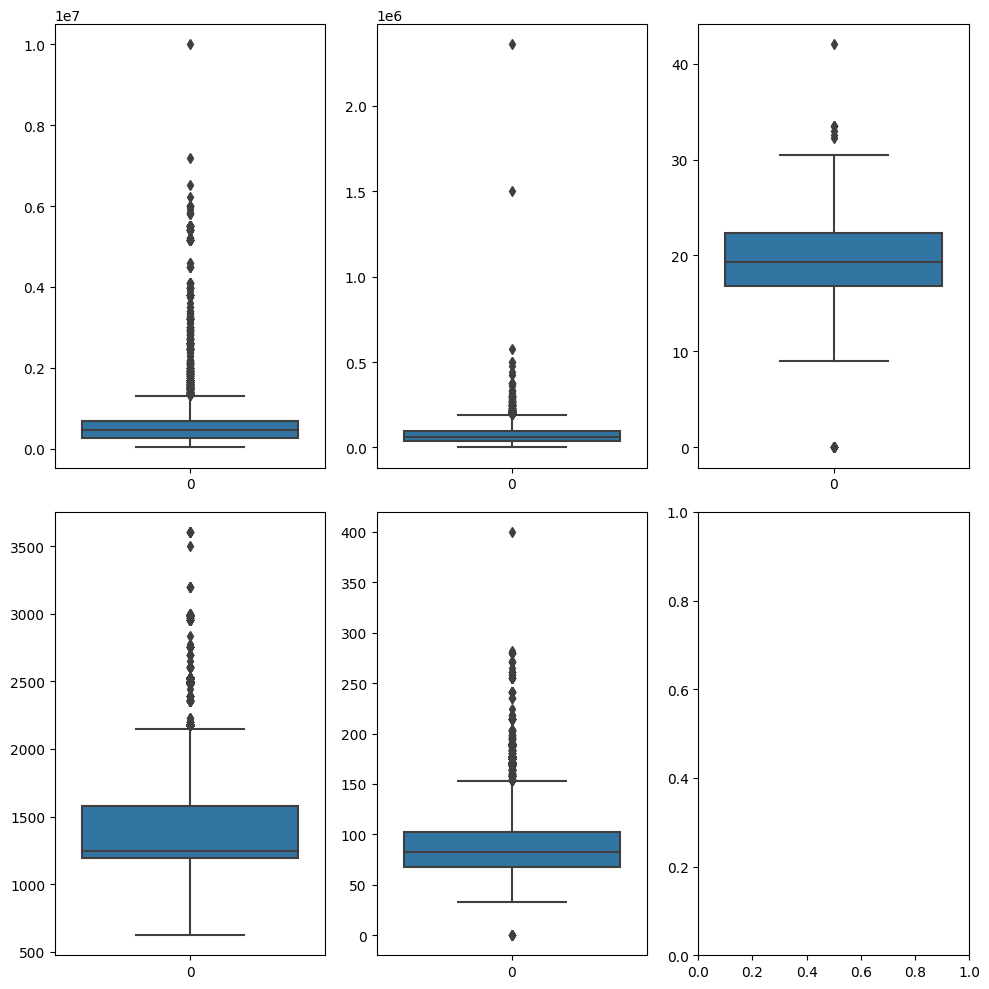

In [1430]:
#Box plot to chck for outliers
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [1432]:
df[df['selling_price']>=10000000]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
170,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.0,4.0


In [1433]:
df = df[df['selling_price'] < 10000000]

In [1434]:
df['selling_price'].describe()

count    8.127000e+03
mean     6.371199e+05
std      7.995860e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      7.200000e+06
Name: selling_price, dtype: float64

In [1435]:
df[df['selling_price']>650000]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
16,2016,778000,70000,Diesel,Individual,Manual,Second Owner,24.52,1248.0,88.50,7.0
19,2016,680000,100000,Diesel,Individual,Manual,First Owner,22.54,1396.0,88.73,5.0
21,2017,950000,50000,Diesel,Individual,Manual,First Owner,25.50,1498.0,98.60,5.0
30,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,5.0
33,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8099,2013,750000,120000,Diesel,Individual,Manual,First Owner,15.10,2179.0,140.00,7.0
8100,2018,800000,85000,Diesel,Individual,Manual,Second Owner,21.50,1497.0,108.50,5.0
8108,2019,1575000,20000,Diesel,Individual,Automatic,First Owner,17.80,1493.0,113.40,5.0
8109,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,5.0


In [1436]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8127 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8127 non-null   int64  
 1   selling_price  8127 non-null   int64  
 2   km_driven      8127 non-null   int64  
 3   fuel           8127 non-null   object 
 4   seller_type    8127 non-null   object 
 5   transmission   8127 non-null   object 
 6   owner          8127 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   float64
 9   max_power      7911 non-null   float64
 10  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 761.9+ KB


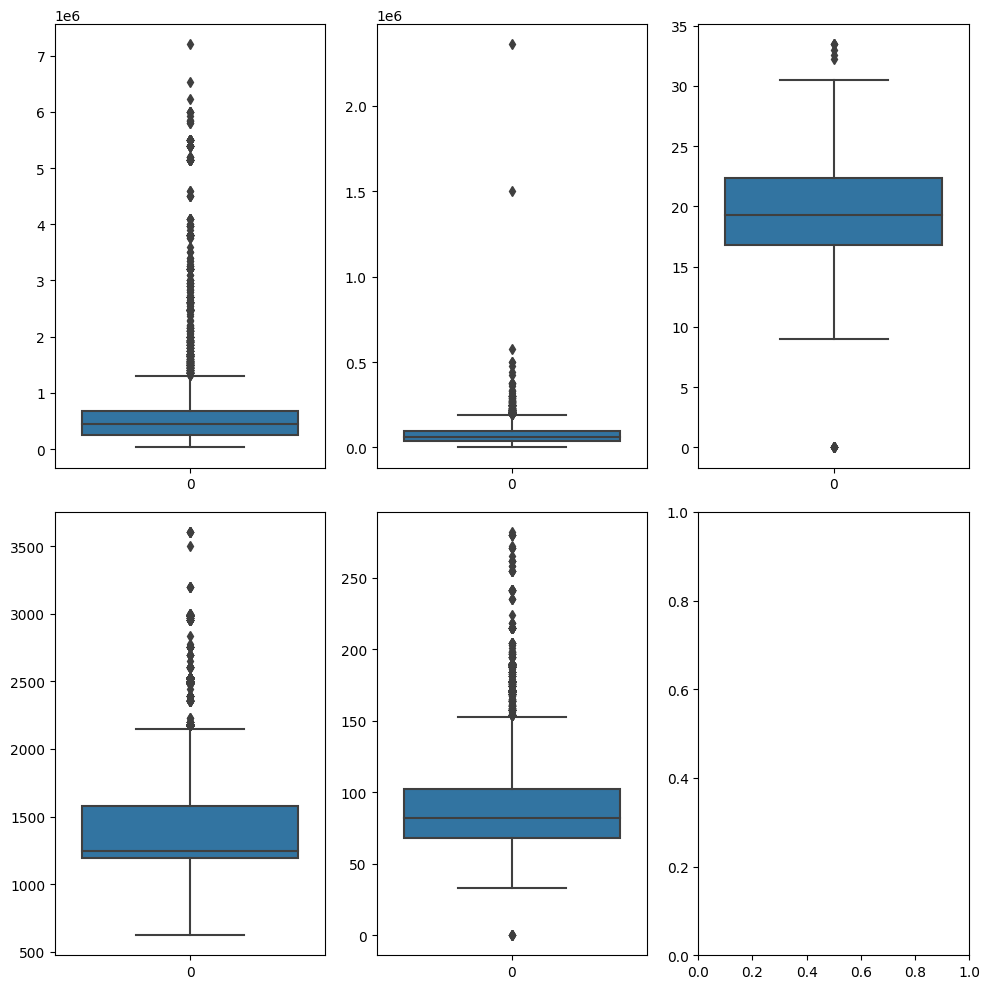

In [1437]:
#Box plot to chck for outliers
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1438]:
df['selling_price'].describe()

count    8.127000e+03
mean     6.371199e+05
std      7.995860e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      7.200000e+06
Name: selling_price, dtype: float64

In [1439]:
df = df[df['selling_price'] < 3500000]

In [1440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7952 non-null   int64  
 1   selling_price  7952 non-null   int64  
 2   km_driven      7952 non-null   int64  
 3   fuel           7952 non-null   object 
 4   seller_type    7952 non-null   object 
 5   transmission   7952 non-null   object 
 6   owner          7952 non-null   object 
 7   mileage        7731 non-null   float64
 8   engine         7731 non-null   float64
 9   max_power      7736 non-null   float64
 10  seats          7731 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 745.5+ KB


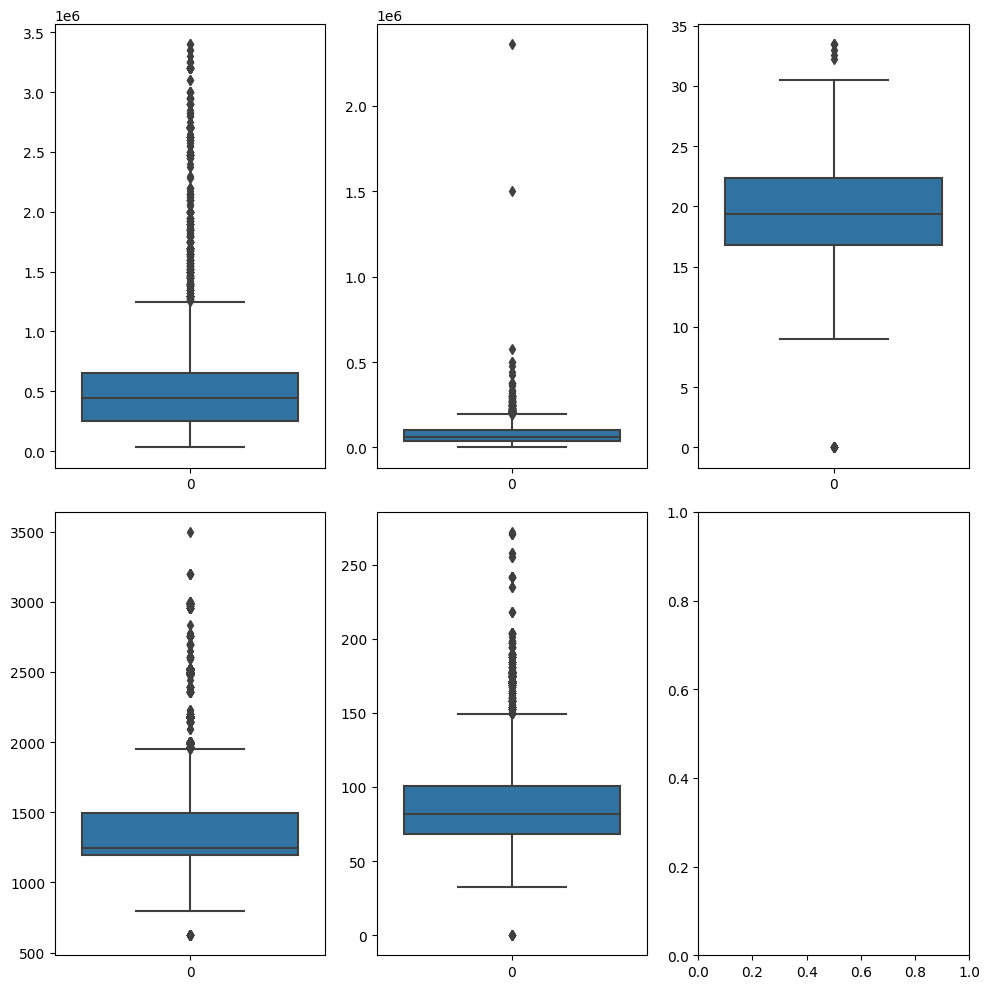

In [1441]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1442]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7952 non-null   int64  
 1   selling_price  7952 non-null   int64  
 2   km_driven      7952 non-null   int64  
 3   fuel           7952 non-null   object 
 4   seller_type    7952 non-null   object 
 5   transmission   7952 non-null   object 
 6   owner          7952 non-null   object 
 7   mileage        7731 non-null   float64
 8   engine         7731 non-null   float64
 9   max_power      7736 non-null   float64
 10  seats          7731 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1003.5+ KB


In [1443]:
df['km_driven'].describe()

count    7.952000e+03
mean     7.097188e+04
std      5.661072e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.300000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [1444]:
df = df[df['km_driven'] < 1000000]

In [1445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7950 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7950 non-null   int64  
 1   selling_price  7950 non-null   int64  
 2   km_driven      7950 non-null   int64  
 3   fuel           7950 non-null   object 
 4   seller_type    7950 non-null   object 
 5   transmission   7950 non-null   object 
 6   owner          7950 non-null   object 
 7   mileage        7729 non-null   float64
 8   engine         7729 non-null   float64
 9   max_power      7734 non-null   float64
 10  seats          7729 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 745.3+ KB


In [1446]:
df['km_driven'].describe()

count      7950.000000
mean      70504.143270
std       47843.878999
min           1.000000
25%       35000.000000
50%       63000.000000
75%      100000.000000
max      577414.000000
Name: km_driven, dtype: float64

In [1447]:
df[df['km_driven']<= 1]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
7913,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.1,1196.0,73.0,5.0


In [1448]:
df=df[df['km_driven'] > 1]

In [1449]:
df['km_driven'].describe()

count      7949.000000
mean      70513.012706
std       47840.351993
min        1000.000000
25%       35000.000000
50%       63000.000000
75%      100000.000000
max      577414.000000
Name: km_driven, dtype: float64

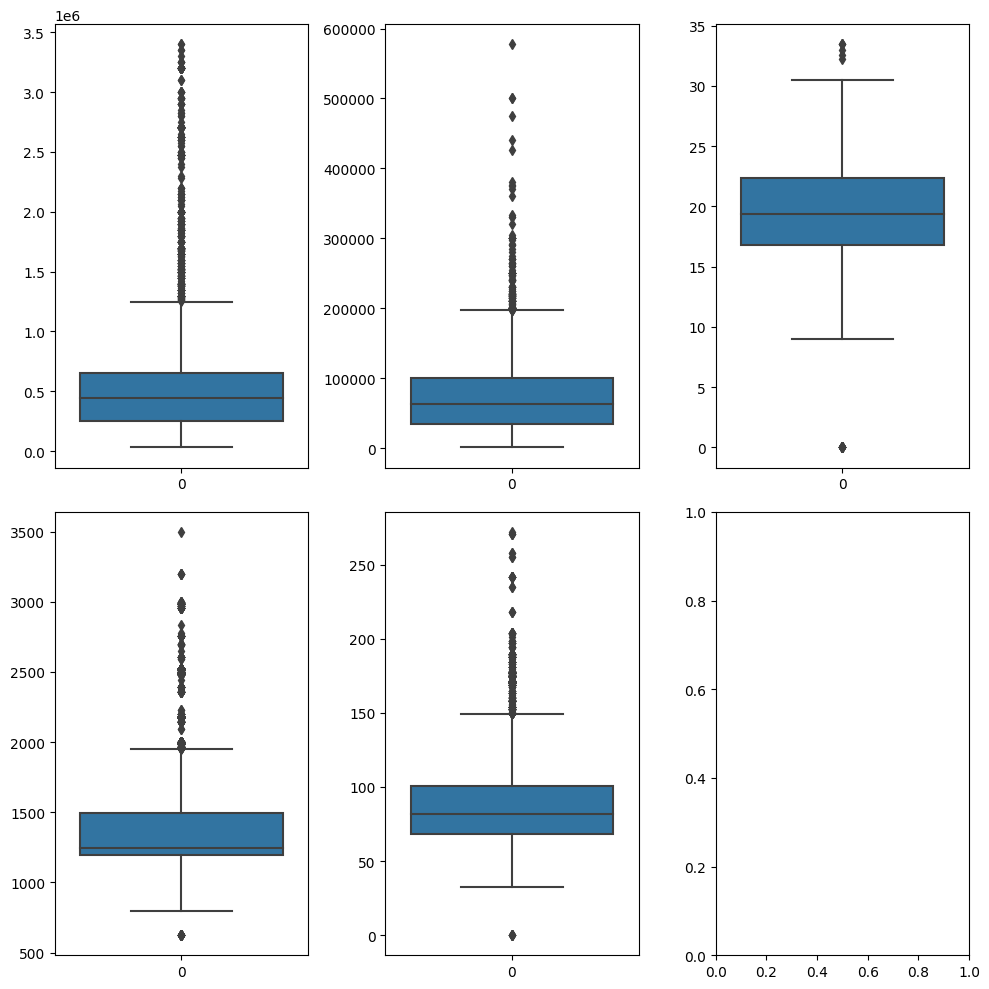

In [1450]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1451]:
df=df[df['km_driven'] <330000]

In [1452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7935 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7935 non-null   int64  
 1   selling_price  7935 non-null   int64  
 2   km_driven      7935 non-null   int64  
 3   fuel           7935 non-null   object 
 4   seller_type    7935 non-null   object 
 5   transmission   7935 non-null   object 
 6   owner          7935 non-null   object 
 7   mileage        7714 non-null   float64
 8   engine         7714 non-null   float64
 9   max_power      7719 non-null   float64
 10  seats          7714 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 743.9+ KB


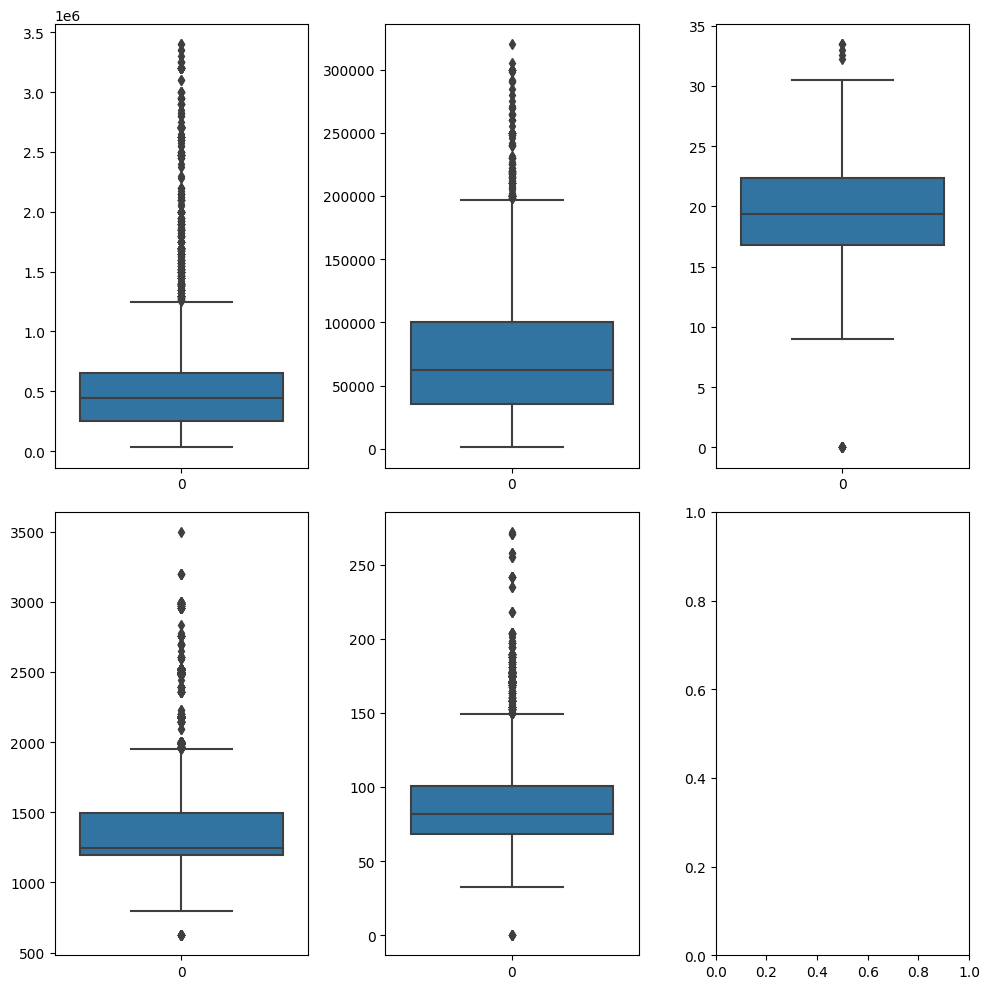

In [1453]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1454]:
df['engine'].describe()

count    7714.000000
mean     1439.725434
std       490.661160
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3498.000000
Name: engine, dtype: float64

In [1455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7935 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7935 non-null   int64  
 1   selling_price  7935 non-null   int64  
 2   km_driven      7935 non-null   int64  
 3   fuel           7935 non-null   object 
 4   seller_type    7935 non-null   object 
 5   transmission   7935 non-null   object 
 6   owner          7935 non-null   object 
 7   mileage        7714 non-null   float64
 8   engine         7714 non-null   float64
 9   max_power      7719 non-null   float64
 10  seats          7714 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 1001.9+ KB


In [1456]:
df=df[df['engine'] <2800]

In [1457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7624 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7624 non-null   int64  
 1   selling_price  7624 non-null   int64  
 2   km_driven      7624 non-null   int64  
 3   fuel           7624 non-null   object 
 4   seller_type    7624 non-null   object 
 5   transmission   7624 non-null   object 
 6   owner          7624 non-null   object 
 7   mileage        7624 non-null   float64
 8   engine         7624 non-null   float64
 9   max_power      7623 non-null   float64
 10  seats          7624 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 714.8+ KB


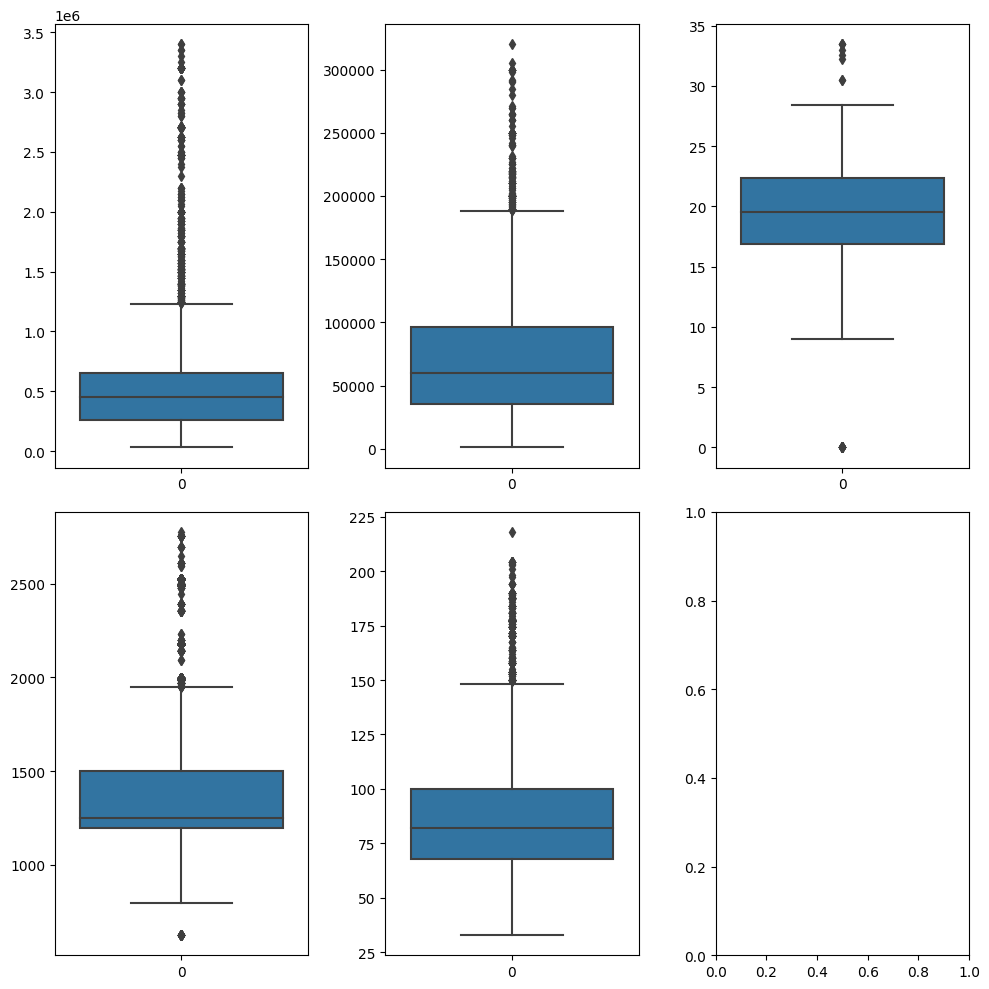

In [1458]:
fig, axs = plt.subplots(2,3, figsize = (10,10))
plt1 = sns.boxplot(df['selling_price'], ax = axs[0,0])
plt2 = sns.boxplot(df['km_driven'], ax = axs[0,1])
plt3 = sns.boxplot(df['mileage'], ax = axs[0,2])
plt4 = sns.boxplot(df['engine'], ax = axs[1,0])
plt5 = sns.boxplot(df['max_power'], ax = axs[1,1])

plt.tight_layout()

In [1459]:
df['max_power'].describe()

count    7623.000000
mean       88.040886
std        29.778793
min        32.800000
25%        68.000000
50%        81.860000
75%       100.000000
max       218.000000
Name: max_power, dtype: float64

In [1460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7624 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7624 non-null   int64  
 1   selling_price  7624 non-null   int64  
 2   km_driven      7624 non-null   int64  
 3   fuel           7624 non-null   object 
 4   seller_type    7624 non-null   object 
 5   transmission   7624 non-null   object 
 6   owner          7624 non-null   object 
 7   mileage        7624 non-null   float64
 8   engine         7624 non-null   float64
 9   max_power      7623 non-null   float64
 10  seats          7624 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 972.8+ KB


In [1461]:
df=df[df['max_power'] <200]

In [1462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7612 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7612 non-null   int64  
 1   selling_price  7612 non-null   int64  
 2   km_driven      7612 non-null   int64  
 3   fuel           7612 non-null   object 
 4   seller_type    7612 non-null   object 
 5   transmission   7612 non-null   object 
 6   owner          7612 non-null   object 
 7   mileage        7612 non-null   float64
 8   engine         7612 non-null   float64
 9   max_power      7612 non-null   float64
 10  seats          7612 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 713.6+ KB


In [1463]:
df2 =df.copy()

In [1464]:
df2

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [1465]:
df2['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [1466]:
def change_transmission(x):
    if x=='Automatic':
        return 1
    else:
        return 0
    
df2['transmission'] = df2['transmission'].apply(change_transmission)

In [1467]:
df2['transmission'].value_counts()

transmission
0    6806
1     806
Name: count, dtype: int64

In [1469]:
df2['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [1470]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7612 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7612 non-null   int64  
 1   selling_price  7612 non-null   int64  
 2   km_driven      7612 non-null   int64  
 3   fuel           7612 non-null   object 
 4   seller_type    7612 non-null   object 
 5   transmission   7612 non-null   int64  
 6   owner          7612 non-null   object 
 7   mileage        7612 non-null   float64
 8   engine         7612 non-null   float64
 9   max_power      7612 non-null   float64
 10  seats          7612 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 713.6+ KB


In [1384]:
df2['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [1471]:
def change_fuel(x):
    if x=='Diesel':
        return 1
    elif x=='Petrol':
        return 2
    elif x=='LPG':
        return 3
    elif x=='CNG':
        return 4
    
df2['fuel'] = df2['fuel'].apply(change_transmission)

In [1473]:
df2['fuel'].value_counts()

fuel
0    7612
Name: count, dtype: int64

In [1387]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel + seller_type", data= df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2165.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:10:53   Log-Likelihood:            -1.0627e+05
No. Observations:                7612   AIC:                         2.126e+05
Df Residuals:                    7605   BIC:                         2.126e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [1388]:
"y_hat =  -2.543e+05 + 3.058e+05  transmission  -2.3759 km_driven + 1.577e+04 mileage+ 9308.5418 max_power  -1.309e+05 fuel + 8.606e+04seller_type"

'y_hat =  -2.543e+05 + 3.058e+05  transmission  -2.3759 km_driven + 1.577e+04 mileage+ 9308.5418 max_power  -1.309e+05 fuel + 8.606e+04seller_type'

In [1389]:
df2.head(1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,Individual,0,First Owner,23.4,1248.0,74.0,5.0


In [1390]:
 -2.543e+05 + 3.058e+05 *(0)  -2.3759*(145500) + 1.577e+04*(23.4)+ 9308.5418*(74.0)  -1.309e+05*(1) + 8.606e+04*(1)

413016.64320000017

In [1485]:
pred_vals = results.predict(df2[['transmission','km_driven','mileage', 'max_power', 'fuel', 'seller_type' ]])
pred_vals

0       267770.194288
1       585390.741690
2       233237.793878
3       460808.392929
4       350867.885880
            ...      
8123    349722.043023
8124    588887.214426
8125    251053.294951
8126    446731.148693
8127    446731.148693
Length: 7612, dtype: float64

In [1392]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df2['selling_price']], axis=1)

In [1393]:
res

,y_hat,selling_price
0,266535.376336,450000
1,584959.976240,370000
2,233404.324260,158000
3,459825.052653,225000
4,351537.574404,130000
...,...,...
8123,349810.176324,320000
8124,589537.804598,135000
8125,250864.197754,382000
8126,445751.118725,290000


In [1394]:
res['error'] = res['y_hat'] - res['selling_price']

In [1395]:
res.head(1)

,y_hat,selling_price,error
0,266535.376336,450000,-183464.623664


In [1396]:
res['sq_error'] = res['error']**2

In [1397]:
np.sqrt(res['sq_error'].mean())

279882.0303541486

(array([1.000e+01, 5.000e+01, 3.800e+01, 1.560e+02, 8.730e+02, 4.424e+03,
        1.815e+03, 2.060e+02, 3.600e+01, 4.000e+00]),
 array([-1855410.29102621, -1524455.32210209, -1193500.35317797,
         -862545.38425385,  -531590.41532973,  -200635.44640561,
          130319.52251851,   461274.49144263,   792229.46036675,
         1123184.42929087,  1454139.39821499]),
 <BarContainer object of 10 artists>)

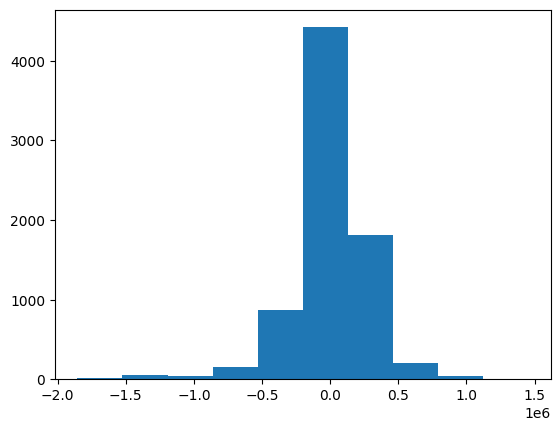

In [1398]:
plt.hist(res['error'])

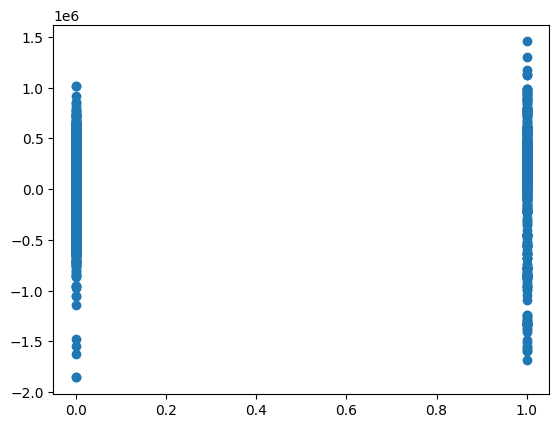

In [1399]:
plt.scatter(df2['transmission'], res  ['error'])

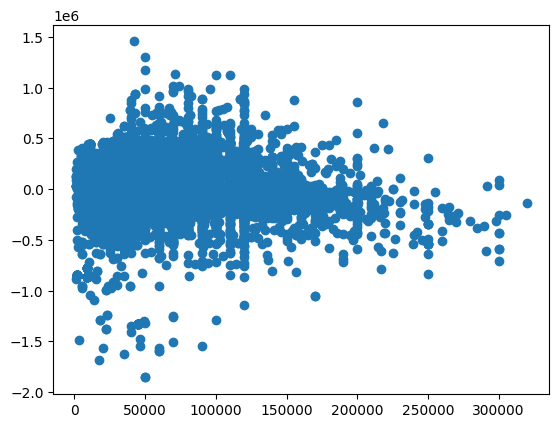

In [1400]:
plt.scatter(df2['km_driven'], res  ['error'])

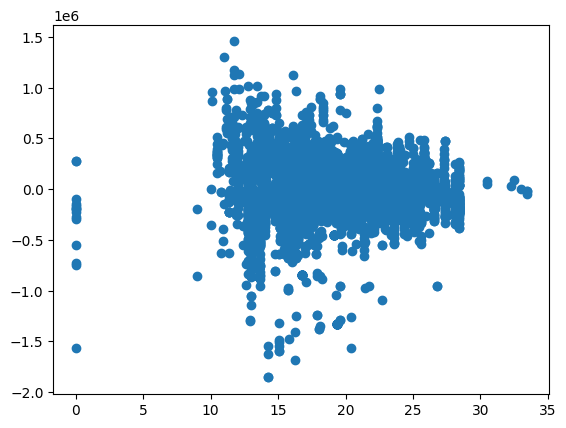

In [1401]:
plt.scatter(df2['mileage'], res  ['error'])


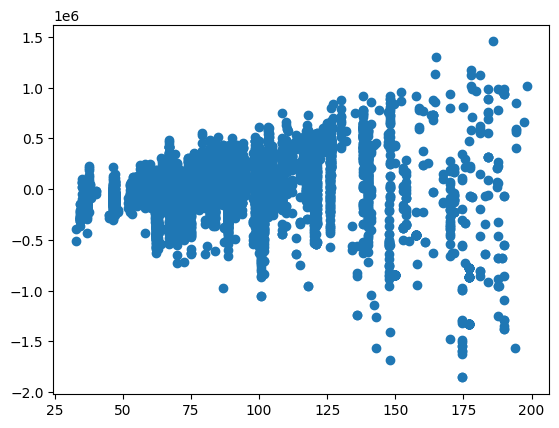

In [1402]:
plt.scatter(df2['max_power'], res  ['error'])


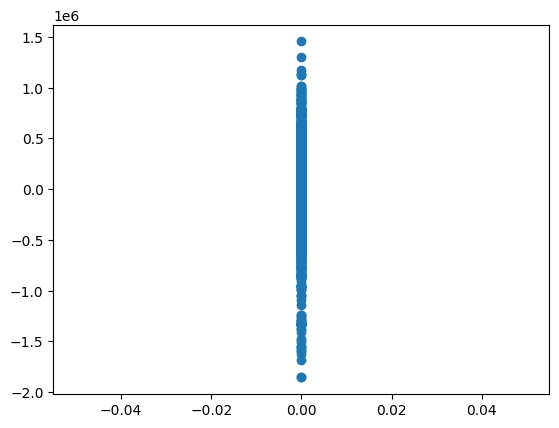

In [1403]:
plt.scatter(df2['fuel'], res  ['error'])


((array([-3.7426203 , -3.51362044, -3.38771506, ...,  3.38771506,
          3.51362044,  3.7426203 ]),
  array([-1855410.29102621, -1855410.29102621, -1679433.38688129, ...,
          1172055.24457862,  1302070.94110851,  1454139.39821499])),
 (268157.5972346047, -1.3369544205136883e-06, 0.9576710647015305))

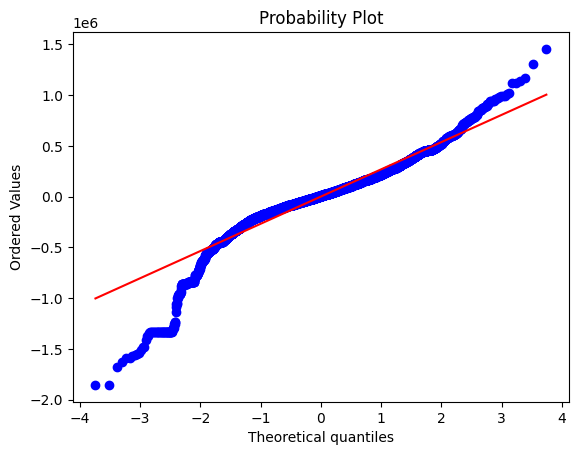

In [1404]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [1405]:
infl = results.get_influence()
print(infl.summary_frame())

      dfb_Intercept  dfb_seller_type[T.Individual]   
0         -0.007848                       0.000741  \
1          0.010023                      -0.002920   
2         -0.000671                      -0.000037   
3          0.012117                      -0.002495   
4         -0.004030                      -0.001002   
...             ...                            ...   
8123      -0.000103                      -0.000198   
8124       0.005361                      -0.005188   
8125       0.000390                       0.000467   
8126       0.001567                      -0.003011   
8127       0.001567                      -0.003011   

      dfb_seller_type[T.Trustmark Dealer]  dfb_transmission  dfb_km_driven   
0                            6.074883e-04          0.002124       0.014271  \
1                           -1.168789e-03          0.002307      -0.009747   
2                            6.648769e-05         -0.000402      -0.004436   
3                           -1.190639e-

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:930: RuntimeWarning: invalid value encountered in divide
  dfbetas /= np.sqrt(np.diag(self.results.normalized_cov_params))


In [1406]:
infl.summary_frame()

,dfb_Intercept,dfb_seller_type[T.Individual],dfb_seller_type[T.Trustmark Dealer],dfb_transmission,dfb_km_driven,dfb_mileage,dfb_max_power,dfb_fuel,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.007848,0.000741,6.074883e-04,0.002124,0.014271,0.009451,-0.000642,NaN,4.047406e-05,0.655452,0.000753,0.017994,0.655428,0.017994
1,0.010023,-0.002920,-1.168789e-03,0.002307,-0.009747,-0.008014,-0.008111,NaN,3.446751e-05,-0.767864,0.000467,-0.016605,-0.767843,-0.016605
2,-0.000671,-0.000037,6.648769e-05,-0.000402,-0.004436,0.000940,0.001419,NaN,4.407567e-06,-0.269356,0.000486,-0.005938,-0.269340,-0.005938
3,0.012117,-0.002495,-1.190639e-03,0.000214,-0.013530,-0.012283,-0.005238,NaN,4.981434e-05,-0.838866,0.000566,-0.019963,-0.838850,-0.019962
4,-0.004030,-0.001002,2.211604e-04,0.001064,-0.007741,0.006410,0.001594,NaN,2.891892e-05,-0.791321,0.000369,-0.015210,-0.791302,-0.015210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,-0.000103,-0.000198,-8.195664e-07,0.000069,-0.000935,0.000193,0.000184,NaN,3.578047e-07,-0.106474,0.000252,-0.001692,-0.106467,-0.001692
8124,0.005361,-0.005188,-1.275767e-03,0.007658,-0.015315,0.004030,-0.014348,NaN,1.348758e-04,-1.623619,0.000409,-0.032848,-1.623794,-0.032852
8125,0.000390,0.000467,-6.385082e-05,0.000645,0.005726,-0.000055,-0.002403,NaN,9.119493e-06,0.468402,0.000332,0.008541,0.468378,0.008541
8126,0.001567,-0.003011,-1.493985e-04,0.001174,0.005838,-0.004287,0.000503,NaN,1.558312e-05,-0.556345,0.000403,-0.011165,-0.556319,-0.011165


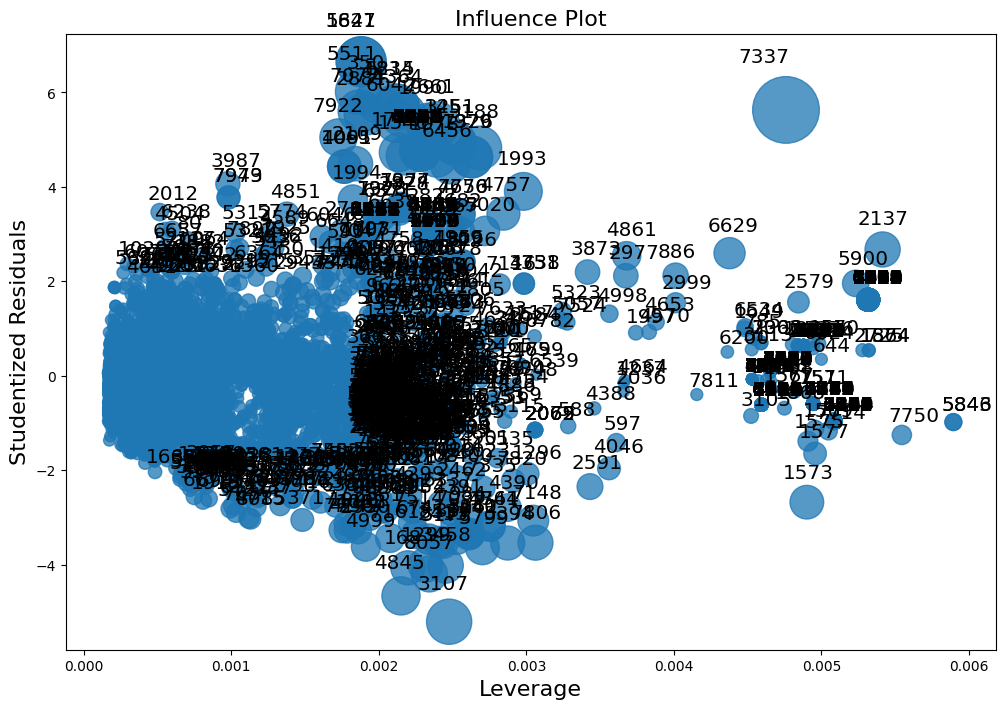

In [1407]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [1408]:
df2.drop(7337, inplace= True)

In [1409]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7611 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7611 non-null   int64  
 1   selling_price  7611 non-null   int64  
 2   km_driven      7611 non-null   int64  
 3   fuel           7611 non-null   int64  
 4   seller_type    7611 non-null   object 
 5   transmission   7611 non-null   int64  
 6   owner          7611 non-null   object 
 7   mileage        7611 non-null   float64
 8   engine         7611 non-null   float64
 9   max_power      7611 non-null   float64
 10  seats          7611 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 713.5+ KB


In [1410]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel + seller_type", data= df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:11:40   Log-Likelihood:            -1.0624e+05
No. Observations:                7611   AIC:                         2.125e+05
Df Residuals:                    7604   BIC:                         2.125e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

/Users/aimaldastagirzada/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [1411]:
infl = results.get_influence()
print(infl.summary_frame())

KeyboardInterrupt: 

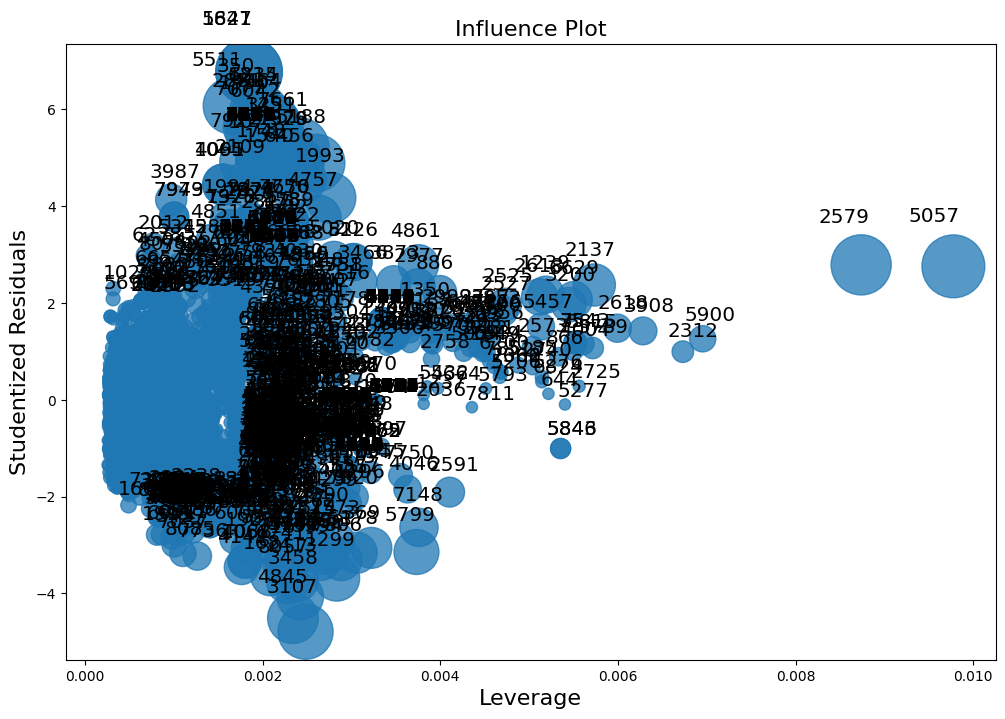

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')


In [ ]:
df2['transmission'].unique()

array([0, 1])

In [ ]:
df2['max_power'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  ,
       100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  ,
       108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,
        68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,  94.68 ,
       160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,  83.8  ,
       126.2  ,  98.96 ,  62.1  ,  86.7  , 177.   , 177.46 , 141.   ,
       117.6  , 190.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   ,
       181.04 , 157.7  , 164.7  ,  91.1  ,  68.   ,  75.   ,  85.8  ,
        87.2  ,  53.   , 118.   , 103.2  ,  83.   ,  84.   ,  58.16 ,
       147.94 ,  74.

In [ ]:
transmission_d = pd.get_dummies(df2.transmission, dtype=int)
transmission_d.rename(columns = {0: 'Easy', 1: 'Hard'}, inplace = True)
df2 = pd.concat([df2,transmission_d], axis=1)

In [ ]:
fuel_d = pd.get_dummies(df2.fuel, dtype=int)
fuel_d = pd.concat([df2,fuel_d], axis=1)

In [ ]:
df2['fuel'].unique()

array([1, 2, 3, 4])

In [ ]:
results = ols("selling_price ~ transmission +km_driven +mileage + max_power + fuel + seller_type", data= df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2295.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:41:47   Log-Likelihood:            -1.0610e+05
No. Observations:                7611   AIC:                         2.122e+05
Df Residuals:                    7604   BIC:                         2.123e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.597e+05   3.42e+04     -7.601   

In [ ]:
df2['year'] = pd.to_datetime(df2['date'])


In [ ]:
#Resampling data set by 2 days
daily_dataset = df2.set_index('date').resample("2D").agg({'selling_price':'mean','transmission':'mean','km_driven':'mean', 'mileage':'mean','max_power':'mean'}).ffill()

In [ ]:
daily_dataset

,selling_price,transmission,km_driven,mileage,max_power
date,,,,,
1970-01-01,540101.206149,0.105768,68974.133097,19.561447,87.858149


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [ ]:
categorical_features = ['transmission']
numerical_features = ['km_driven','mileage', 'max_power']
target = 'selling_price'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2[categorical_features + numerical_features]
                                                    ,df2[target],
                                                    test_size = 0.3, random_state=1234)

In [ ]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [ ]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [ ]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transmission']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['km_driven', 'mileage',
                                                   'max_power'])])),
                ('regressor', LinearRegression())])

In [ ]:
pred = linear_regression.predict(X_test)

In [ ]:
pred 

array([478576., 762672., 359904., ..., 817664., 225104., 395040.])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(pred,y_test))

285106.8507849325

In [ ]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [ ]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transmission']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['km_driven', 'mileage',
                                                   'max_power'])])),
                ('regressor', Ridge(alpha=3.0))])

In [ ]:
pred_ridge = ridge_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(pred_ridge,y_test))


284971.6676066201

In [ ]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [ ]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['transmission']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['km_driven', 'mileage',
                                                   'max_power'])])),
                ('regressor', Lasso())])

In [ ]:
lasso_pred = lasso_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

284950.2033041507

In [ ]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [ ]:
elasticnet_regression.fit(X_train, y_train)
elasticnet_pred = elasticnet_regression.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

298182.6830574334

In [ ]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


In [ ]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['selling_price']


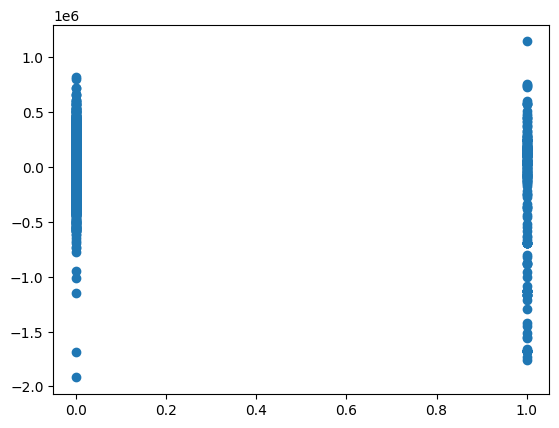

In [ ]:
plt.scatter(X_test['transmission'],elastic_net_pred['res'])

In [ ]:
lasso_net_pred = pd.concat([pd.DataFrame(lasso_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)


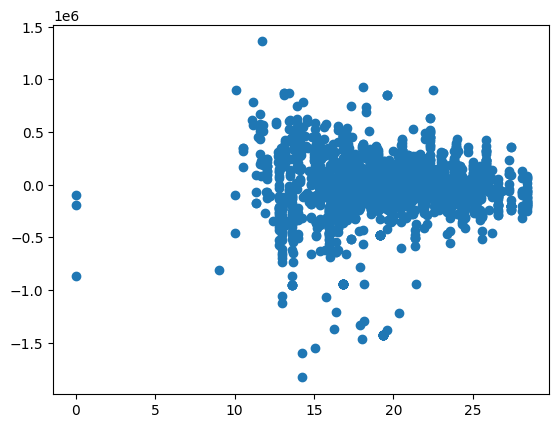

In [ ]:
lasso_net_pred['res'] = lasso_net_pred['pred'] - lasso_net_pred['selling_price']

plt.scatter(X_test['mileage'],lasso_net_pred['res'])

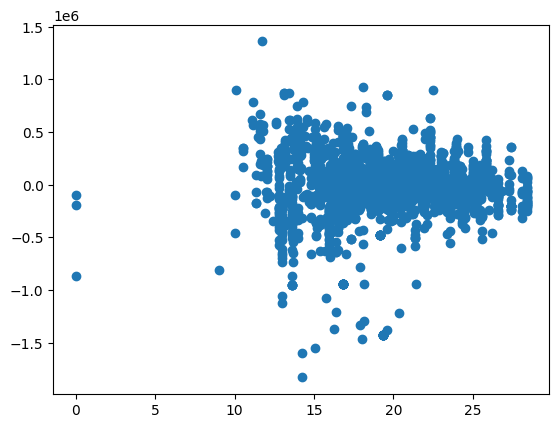

In [ ]:
ridge_net_pred = pd.concat([pd.DataFrame(pred_ridge).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_net_pred['res'] = ridge_net_pred['pred'] - ridge_net_pred['selling_price']
plt.scatter(X_test['mileage'],ridge_net_pred['res'])
